# Aula 05

Sumário

- [Introdução](#introdução)
- [Bases de Dados](#bases-de-dados)
  - [A base de dados que será utilizada no nosso exemplo](#a-base-de-dados-que-será-utilizada-no-nosso-exemplo)
- [Analisando o Panorama Geral](#analisando-o-panorama-geral)
  - [Abordando o problema](#abordando-o-problema)
  - [Medida de desempenho](#medida-de-desempenho)
- [Mão na massa](#mão-na-massa)
  - [Separando o conjunto de dados](#separando-o-conjunto-de-dados)

## Introdução

Vamos seguir o modelo didático do nosso livro-texto. Vamos simular todo um projeto de Aprendizado de Máquina como se fôssemos um cientista de dados contratado por uma empresa de mercado imobiliário. O passo-a-passo que seguiremos:

1. Analisar o panorama geral.
2. Obter os dados.
3. Identificar e visualizar os dados para obter informações úteis.
4. Preparar os dados para os algoritmos de AM.
5. Selecionar e treinar um modelo.
6. Aperfeiçoar o modelo.
7. Apresentar a solução.
8. Disponibilizar em produção, monitar e fazer a manutenção do sistema.

## Bases de Dados

As `bases de dados` das empresas são privadas, ou seja, restritas para uso interno. Entretanto, existem alguns sites que disponibilizam dezenas a centenas de `bases de dados` abertos, os quais podemos baixar para aprendermos os variados algoritmos de AM. Essas `bases de dados` abertas são utilizadas também como `benchmark` de novos modelos e métodos.

A seguir uma lista de repositórios:

* [UCI Irvine ML Repository](http://archive.ics.uci.edu/)
* [Kaggle](https://www.kaggle.com/datasets)
* [AWS](https://registry.opendata.aws/)

Metaportal de dados

* [Data Portals](http://dataportals.org/)

Páginas com listagem de repositórios

* [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
* [Reddit](https://www.reddit.com/r/datasets)

### A base de dados que será utilizada no nosso exemplo

Vamos seguir com o livro e utilizar a mesma base de dados. O `github` do autor é [Ageron](https://github.com/ageron). Os códigos utilizados por ele para a última versão do seu livro é a [Handson ML3](https://github.com/ageron/handson-ml3/tree/main). A base de dados que vamos utilizar está disponível [nesta página](https://github.com/ageron/data/tree/main/housing).

Para utilizar essa base você tem as seguintes opções:

1. Baixar (ou clonar) o repositório [data](https://github.com/ageron/data/tree/main), e depois pegar somente a base que você quer. Esse caso é o recomendado se você quer pegar logo todas as bases presentes no repositório.
2. Caso você esteja usando `Linux`, dá para seguir o passo-a-passo mostrado na célula 04 [deste arquivo](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb).
3. Baixar os arquivos `raw` e `md` isoladamente.

O autor fez uns poucos ajustes nos dados para efeitos didáticos.

## Analisando o Panorama Geral

Bem vindo à Companhia Habitacional. A primeira tarefa será criar um modelo de preços para o setor imobiliário usando os dados do censo do Estado da Califórnia. Esses dados têm indicadores como população, reda média e preço médio do imóvel para cada grupo de bairros. Os grupos de bairros são a menor unidade geográfica para a qual o Departamento de Censo dos Estados Unidos publica dados de amostra (um grupo de bairro geralmente comporta uma população de 600 a 3 mil pessoas). Para abreviar, os chamaremos de "regiões".

### Abordando o problema

Para começar, é interessante adquirir algumas informações sobre o problema, e o que se espera do modelo de AM. Um exemplo de perguntas: Qual é exatamente o objetivo do negócio? Como a empresa espera usar e se beneficar desse modelo?

Suponha que seu chefe tenha respondido o seguinte: "O objetivo do seu modelo é gerar uma predição do preço médio dos imóveis no bairro. Esses dados alimentarão outro sistema de aprendizado de máquina, junto com outros sinais. O sistema estabelecerá se vale a pena investir em uma área ou não".

<div style="text-align: center;">
    <img src="imagens/figura01.png"><br>
    <caption>Figura 01: Pipeline de aprendizado de máquina para investimentos imobiliários (fonte: livro-texto)</caption>
</div>

Outra informação importante é sabermos como é a solução atual, ou seja, como a empresa está adquirindo/gerando as predições antes do nosso modelo, caso exista. A resposta pode nos dar algum *insight* sobre o que fazer, com quem falar, ou apenas perceber que a empresa está necessitando mesmo de um modelo que a ajude nessa tarefa.

A partir de tudo o que vimos até agora, vamos responder as seguintes questões:

* Que tipo de aprendizado devemos usar: supervisionado, não-supervisionado, ou reforço?
  * <details><summary>Resposta</summary>Aprendizado Supervisionado</details>
* Qual será a tarefa do modelo: classificação, regressão, agrupamento, ou outra coisa?
  * <details><summary>Resposta</summary>Regressão</details>
* A apresentação dos dados será em *batch* ou *online*?
  * <details><summary>Resposta</summary>Batch</details>

### Medida de desempenho

Agora que já temos definidos o problema e como vamos abordá-lo, devemos definir também uma `medida de desempenho` para o nosso modelo.

Uma das `medidas de desempenho` mais utilizada --- senão a mais utilizada --- em `regressão` é a `RMSE` (*Root Mean Square Deviation*, ou Raiz do Erro Quadrático Médio). Essa medida nos dá uma ideia da quantidade de erros gerados pelo modelo em suas predições, dando um peso maior para grandes erros. Descrição mais formal do RMSE, [do site da Oracle](https://docs.oracle.com/cloud/help/pt_BR/pbcs_common/PFUSU/insights_metrics_RMSE.htm#PFUSU-GUID-FD9381A1-81E1-4F6D-8EC4-82A6CE2A6E74):

> O Erro Quadrático Médio (RMSE) é o `desvio padrão` dos valores residuais (erros de previsão). Os valores residuais são uma medida de distância entre a linha de regressão e os pontos de dados. O RMSE é uma medida da dispersão desses valores residuais. Em outras palavras, ele informa o quão concentrados os dados estão em torno da linha de melhor ajuste.

Vejamos a fórmula:

$RMSE = \sqrt{\sum^{n}_{i=1}\dfrac{(\hat{y_{i}} - y_{i})^{2}}{n}}$, onde

* $n$: número de instâncias.
* $\hat{y_{i}}$: valor predito para a instância $i$.
* $y_{i}$: valor real da instância $i$.

## Mão na massa

Vamos carregar os dados:

In [6]:
import pandas as pd

# Carregando os dados
housing = pd.read_csv("../datasets/housing/housing.csv")

# Vamos dar uma olhada rápida
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Vamos ver outras informações
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Verificando quantas instâncias para cada valor categórico da coluna ocean_proximity
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
# Outras informações
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


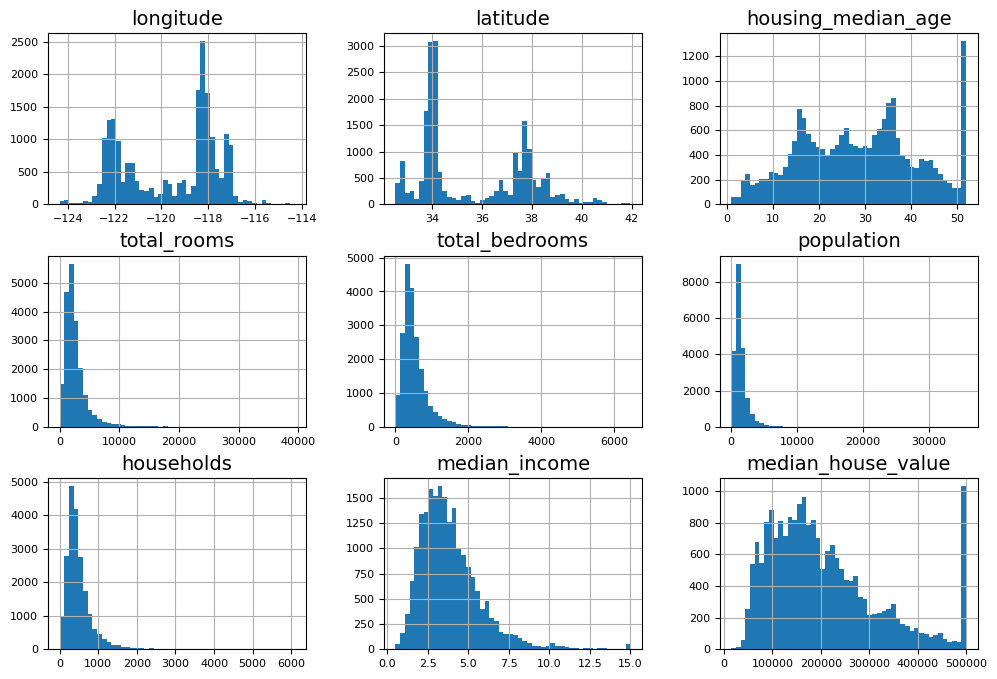

In [13]:
# Vamos ver o histograma de cada atributo numérico
import matplotlib.pyplot as plt

# Ajustando o tamanho das fontes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins=50,figsize=(12,8))
plt.show() #opcional no jupyter notebook

A partir do histograma já conseguimos visualizar algumas propriedades interessantes da base:

1. A **mediana de renda** (*median_income*). Nos EUA a renda é mostrada como o valor ganho anualmente. Então, se uma pessoa ganha 5K mensais, sua renda é 60K anuais. Mas no gráfico aparecem de 0.5 até 15 --- o pior é que já deveríamos ter visto isso quando executamos o `housing.describe()`. Em uma situação real você deveria entrar em contato com a empresa, com os responsáveis pela coleta dos dados para saber o que aconteceu neste caso. Supondo que você entrou em contato, a equipe respondeu que os valores foram redimensionados para a faixa de valores entre 0 e 15. Ou seja, não há com o que se preocupar neste caso.
2. Outra característica que chamou atenção foram os plots de `house_median_age` e `median_house_value`. Perceba que há uma quantidade enorme de instâncias para o último valor. Este é, novamente, um caso para vermos com a equipe que coletou os dados. Descobrimos então que as idades acima de 50 anos eram desconsideradas e marcadas como 50, e também valores acima de 500K eram desconsiderados e marcados como 500K. Porém, o atributo `median_house_value` é justamente o que queremos prever. Se utilizarmos os dados como estão agora, nosso modelo pode acabar aprendendo que nenhuma casa passa de 500K de valor (o que não é verdade). O que fazer? Temos duas opções:
   1. Coletar os valores adequados das casas que valem mais de 500K.
   2. Remover todas as instâncias de 500K, o que poderá permitir ao modelo prever valores além disso.
3. Os atributos possuem escalas muito diferentes. É possível lidarmos com isso mais a frente.
4. Alguns histogramas mostram casos de `heavy tails` ou "caudas longas". Esse tipo de distribuição dos dados podem afetar a detecção de padrões, e teremos de nos adaptar a isso.

### Separando o conjunto de dados

Como vimos anteriormente, precisamos separar os dados em conjuntos de treinamento e teste. Vamos fazer uma separação "simplificada", ou seja, selecionar aleatoriamente um conjunto pequeno de dados e separá-los no `conjunto de teste`, e o restante usaremos como o `conjunto de treinamento`.

In [14]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # Embaralhando os índices
    shuffle_indices = np.random.permutation(len(data))
    # Calculando a quantidade de instâncias para o conjunto de teste
    test_set_size = int(len(data) * test_ratio)
    # Selecionando o conjunto de teste, do índice 0 até test_set_size - 1
    test_indices = shuffle_indices[:test_set_size]
    # Selecionando o conjunto de treinamento, do índice teste_set_size até o fim
    train_indices = shuffle_indices[test_set_size:]
    # Retornando os índices dos conjuntos de treinamento e teste
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
# Dividindo os dados
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [16]:
len(test_set)

4128

Toda vez que executamos as 3 células acima, nosso conjunto de treinamento e teste sempre será diferente. Isso significa que toda vez que fizermos o treinamento e executamos o teste, teremos valores de resultados diferentes. A princípio isso não é necessariamente algo ruim, e podemos lidar com isso melhor com o uso do `k-fold`. Deixaremos para utilizá-lo em um futuro próximo.

Para evitar que isso ocorra, ou seja, para que o conjunto de teste e treinamento sejam iguais, ou o mais parecidos possível, você deve configurar a *seed* para o método `random` do `numpy` antes de executar o `random.permutation()`. Por exemplo:

```python
np.random.seed(42)
```

No livro-texto você pode encontrar outras alternativas. Mas não precisamos bater cabeça com isso, pois o `scikit-learn` já faz isso por nós.

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

A separação dos conjuntos é feita de forma aleatória. Entretanto, uma separação aleatória pode acabar introduzindo algum viés ao selecionar para o conjunto de treinamento uma amostra com diferenças do conjunto de teste. Por exemplo, se tivermos uma base de dados com cerca de 45% de homens e 55% de mulheres e fizermos uma separação aleatória, é possível que no conjunto de treinamento tenhamos 70% de homens e 30% de mulheres, o que não corresponde com a realidade.

A solução para isso é fazer a separação de forma `estratificada`, ou seja, levamos em consideração alguma característica importante no momento da divisão dos dados.

Suponha que a equipe que coletou os dados tenha dito que o atributo `median_income` é importante e, por isso, deve ser levado em consideração. Além disso eles nos informaram que esse atributo pode ser categorizado em cinco faixas: 0 a 1.5, 1.5 a 3.0, 3.0 a 4.5 e 4.5 a 6. Nós podemos criar uma coluna a mais para registrar essa informação:

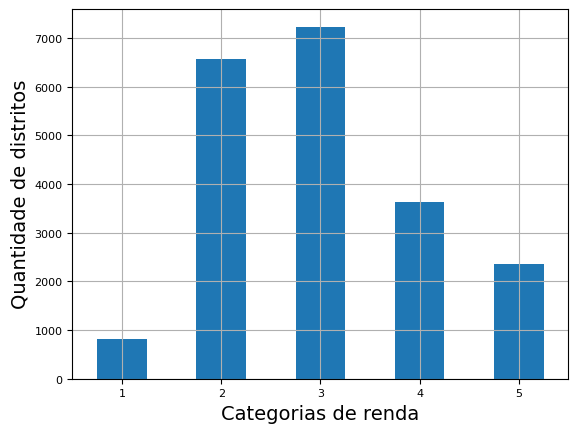

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Categorias de renda")
plt.ylabel("Quantidade de distritos")
plt.show()

Agora podemos separar os dados de forma estratificada, considerando o novo atributo:

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# Verificando a amostragem estratificada
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

A amostragem estratificada foi apenas uma exemplificação. Agora devemos excluir a coluna para que os dados voltem ao estado original:

In [ ]:
for conjunto in (strat_train_set, strat_test_set):
    conjunto.drop("income_cat", axis=1, inplace=True)